# EMアルゴリズム

教師なり学習によるクラスタリングのアルゴリズムである、最尤推定法を利用したEMアルゴリズムを用いて、手書き文字の分類を行う。

## ベルヌーイ分布を用いた最尤推定法

まずは、特定の文字だけからなる手書き文字サンプル群から、それらを平均化した「代表文字」を生成する方法について考える。

### 「画像生成器」による最尤推定法の適用

ランダムに手書き文字を生成する「画像生成器」を用意する。この画像生成器をベクトル$\mu$で表す。$\mu$の各成分の値は、「対応するピクセルが黒になる確率」である。今トレーニングセットとなる特定の数字の手書きデータが$N$個あるとする。そして、ある画像生成器を用意して、これから$N$この画像を生成する。このとき「トレーニングセットとまったく同じデータ群が生成される確率」を考えると、この確率を表す関数が尤度関数であり、この確率を最大にするような画像生成器を見つけ出せば、トレーニングセットを代表する画像になっていると期待できる。

まずトレーニングセットに含まれる特定の画像データを$\mathbf{x}$とする。$\mathbf{x}$は第$i$成分の値$x_i$が$i$番目のピクセルの値(黒が1、白が0)を表すベクトルである。ピクセル数は全部で$D$個あるものとする。このとき$i$番目のピクセルの色が得られる確率$p_i$は

$$
\begin{cases}
x_i=1\text{の場合:}& p_i = \mu_i\\
x_i=0\text{の場合:}& p_i = 1 - \mu_i
\end{cases}
$$

上記はまとめて以下の通り表せる(この式はベルヌーイ分布と呼ばれる確率分布である。)。

$$
p_i = \mu_i^{x_i}(1-\mu_i)^{1-x_i} \tag{7.4}
$$

従って、すべてのピクセルについて(画像生成器が生成した画像と$\mathbf{x}$が)同じ色になる確率は次式で与えられる。

$$
p(\mathbf{x}) = \prod_{i=1}^D p_i = \prod_{i=1}^D \mu_i^{x_i}(1-\mu_i)^{1-x_i} \tag{7.5}
$$

さらに、トレーニングセットに含まれるすべてのデータ$\left\{ x_n \right\}_{n=1}^N$を考えると、これらすべてに一致する画像が得られる確率は以下になる。

$$
P = \prod_{n-1}^N p(\mathbf{x}_n) = \prod_{n=1}^N \prod_{i=1}^D \mu_i^{[\mathbf{x}_n]_i}(1 - \mu_i)^{1-[\mathbf{x}_n]_i} \tag{7.6}
$$

これがこのモデルにおける尤度関数になる。これを最大化する$\mathbf{\mu}$を求める。(7.6)の対数尤度関数は

$$
\ln{P} = \sum_{n=1}^N \sum_{i=1}^D \left\{ [\mathbf{x}_n]_i \ln{\mu_i} + (1 - [\mathbf{x}_n]_i) \ln(1-\mu_i) \right\} \tag{7.7}
$$

これを$\mu_i$で偏微分すると、

$$
\begin{align*}
\frac{\partial (\ln{P})}{\partial \mu_i} &= \partial[\sum_{n=1}^N \left\{ [\mathbf{x}_n]_i \ln{\mu_i} + (1 - [\mathbf{x}_n]_i) \ln(1-\mu_i) \right\}] \cdot \frac{1}{\partial \mu_i} \\
&= \sum_{n=1}^N (\frac{[\mathbf{x}_n]_i}{\mu_i} - \frac{1 - [\mathbf{x}_n]_i}{1 - \mu_i}) \tag{7.8}
\end{align*}
$$

これが$0$になるという条件より

$$
\begin{align*}
&\sum_{n=1}^N (\frac{[\mathbf{x}_n]_i}{\mu_i} - \frac{1 - [\mathbf{x}_n]_i}{1 - \mu_i}) \ =\  \sum_{n=1}^N \frac{[\mathbf{x}_n]_i (1 - \mu_i) - \mu_i(1 - [\mathbf{x}_n]_i)}{\mu_i (1 - \mu_i)} \\
&= \sum_{n=1}^N \frac{[\mathbf{x}_n]_i - \mu_i}{\mu_i (1 - \mu_i)} \ =\  \frac{1}{\mu_i (1 - \mu_i)} \sum_{n=1}^N ([\mathbf{x}_n]_i - \mu_i) \ =\  \frac{1}{\mu_i (1 - \mu_i)} (\sum_{n=1}^N [\mathbf{x}_n]_i - N \mu_i) \ =\  0
\end{align*} 
$$

以上から$\mu_i$は

$$
\mu_i = \frac{1}{N} \sum_{n=1}^N [\mathbf{x}_n]_i \tag{7.9}
$$

(7.9)をベクトル表記にすると$\mathbf{\mu}$が得られる。

$$
\mathbf{\mu} = \frac{1}{N} \sum_{n=1}^N \mathbf{x}_n \tag{7.1}
$$

## 混合分布を用いた最尤推定法

### 混合分布による確率の計算

次に、複数の数字の手書き画像データが混在している場合に、文字の種類ごとに画像データを分類する方法を考える。

トレーニングセットは全部で$K$種類の数字を含む手書き文字画像で構成されているとする。ここで画像合成器を用意して、これからトレーニングセットと同じ画像が得られる確率を考える。今回はそれぞれの文字に対応する画像生成器を用意する必要があるため、全部で$K$個の画像生成器を$\left\{ \mathbf{\mu}_k \right\}_{k=1}^K$とする。

まず特定の画像生成器$\mathbf{\mu}_k$から画像$\mathbf{x}$が得られる確率は次式で表せる。

$$
p_{\mathbf{\mu}_k}(\mathbf{x}) = \prod_{i=1}^{D} [\mathbf{\mu}_k]_i^{x_i} (1 - [\mathbf{\mu}_k]_i) ^{1 - x_i} \tag{7.10}
$$

また$k$番目の画像生成器を選ぶ確率を$\pi_k$とする。このとき$\left\{ \pi_k \right\}_{k=1}^K$は次の条件を満たす。

$$
\sum_{k=1}^K \pi_k = 1 \tag{7.11}
$$

上記を加味して特定の画像$\mathbf{x}$が得られる確率は次式で表せる。

$$
p(\mathbf{x}) = \sum_{k=1}^K \pi_k p_{\mathbf{\mu}_k} (\mathbf{x}) \tag{7.12}
$$

トレーニングセットに含まれるデータ数を$N$として、上記の走査を$N$回繰り返したときに生成される$N$この画像が、トレーニングセットのデータ群と一致する確率は次式で表せる。

$$
P = \prod_{n=1}^N p(\mathbf{x}_n) = \prod_{n=1}^N \sum_{k=1}^K \pi_k p_{\mathbf{\mu}_k} (\mathbf{x}_n) \tag{7.13}
$$

上式がこのモデルの尤度関数になる。パラメーターは、それぞれの画像生成器を表すベクトル$\left\{ \mathbf{\mu}_k \right\}_{k=1}^K$と、それぞれの画像生成器を選択する確率$\left\{ \pi_k \right\}_{k=1}^K$になる。

### EMアルゴリズムの手続き

(7.13)を最大化するパラメーターを決定するために、EMアルゴリズムを用いる。

まず、$K$個の画像生成器$\left\{ \mathbf{\mu}_k \right\}_{k=1}^K$を適当に用意して、それぞれの画像生成器を選択する確率$\left\{ \pi_k \right\}_{k=1}^K$も適当な値に設定しておく。このとき、「どれか一つの画像生成器を確率$\left\{ \pi_k \right\}_{k=1}^K$に従ってランダムに選択して、新しい画像を生成する」という操作を行った際に画像$\mathbf{x}_n$が得られる確率は次式で与えられる。

$$
p(\mathbf{x}_n) = \sum_{k=1}^K \pi_k p_{\mathbf{\mu}_l} (\mathbf{x}_n) \tag{7.14}
$$

ここで特定の$k$番目の画像生成器から画像$\mathbf{x}_n$が得られる可能性について、その割合を次式で取り出す。

$$
\gamma_{nk} = \frac{\pi_k p_{\mathbf{\mu}_k}(\mathbf{x}_n)}{ \sum_{k'=1}^K \pi_{k'} p_{\mu_{k'}} (\mathbf{x}_n) } \tag{7.15}
$$

(k平均法における、データ$\mathbf{x}_n$が所属する代表点の決定に相当)

次に上記操作で決めた、それぞれの画像生成器に所属する割合に基づいて、新たに画像生成器$\left\{ \mathbf{\mu}_k \right\}_{k=1}^K$と、それぞれの画像生成器を選択する確率$\left\{ \pi_k \right\}_{k=1}^K$を以下式で計算しなおして再設定する。

$$
\mathbf{\mu_k} = \frac{\sum_{n=1}^N \gamma_{nk} \mathbf{x}_n}{\sum_{n=1}^N \gamma_{nk}} \tag{7.16}
$$

$$
\pi_k = \frac{ \sum_{n=1}^N \gamma_{nk} }{N} \tag{7.17}
$$

(k平均法における、重心を用いた新たな代表点の取り直しに相当)

後は今求めた$\left\{ \mathbf{\mu}_k \right\}_{k=1}^K$と$\left\{ \pi_k \right\}_{k=1}^K$を用いて再度(7.15)で$\gamma_{nk}$を計算しなおして、さらにまた(7.16)と(7.17)で計算する、というようにこれらの手続きを繰り返す。

In [1]:
# データの準備

import re

Num = 600 # 抽出する文字数
Chars = '[036]' # 抽出する数字

labels = open('./train-labels.txt', 'r')
images = open('./train-images.txt', 'r')
labels_out = open('sample-labels.txt', 'w')
images_out = open('sample-images.txt', 'w')
chars = re.compile(Chars)

while True:
    label = labels.readline()
    image = images.readline()
    if (not image) or (not label):
        break
    if not chars.search(label):
        continue
    
    line = ''
    for c in image.split(" "):
        if int(c) > 127:
            line += '1,'
        else:
            line += '0,'
    line = line[:-1]
    labels_out.write(label)
    images_out.write(line + '\n')
    Num -= 1
    if Num == 0:
        break

labels.close()
images.close()
labels_out.close()
images_out.close()

images = open('sample-images.txt', 'r')
samples = open('samples.txt', 'w')
c = 0

while True:
    line = images.readline()
    if not line:
        break
    x = 0
    for s in line.split(','):
        if int(s) == 1:
            samples.write('#')
        else:
            samples.write(' ')
        x += 1
        if x % 28 == 0:
            samples.write('\n')
    c += 1
    if c == 10:
        break
    
images.close()
samples.close()

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas import Series, DataFrame
from numpy.random import randint, rand

In [3]:
K = 3 # 分類する文字数
N = 10 # 反復回数

iter_num 0
iter_num 1
iter_num 2
iter_num 3
iter_num 4
iter_num 5
iter_num 6
iter_num 7
iter_num 8
iter_num 9


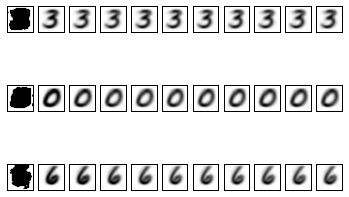

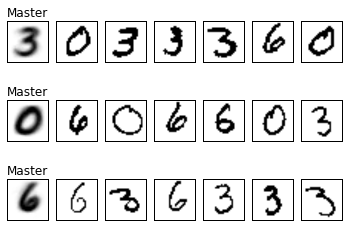

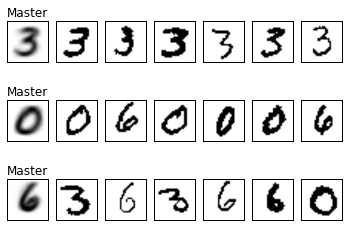

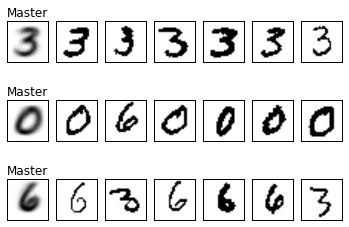

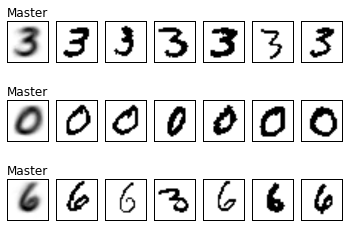

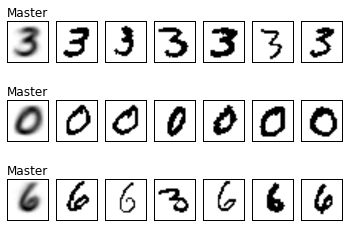

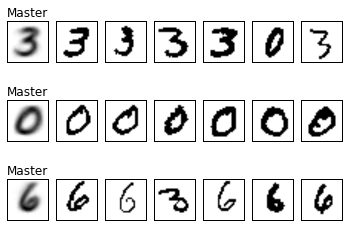

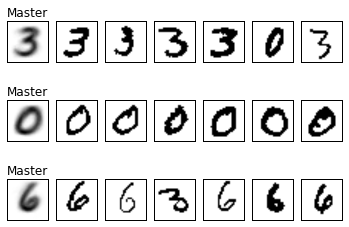

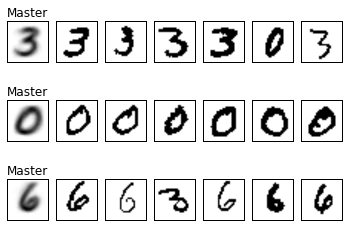

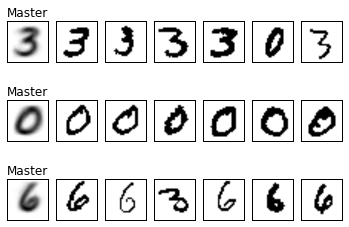

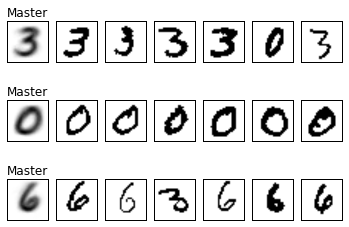

In [5]:
# 分類結果の表示
def show_figure(mu, cls):
    fig = plt.figure()
    for c in range(K):
        subplot = fig.add_subplot(K, 7, c * 7 + 1)
        subplot.set_xticks([])
        subplot.set_yticks([])
        subplot.set_title('Master')
        subplot.imshow(mu[c].reshape(28, 28), cmap=plt.cm.gray_r)
        i = 1
        for j in range(len(cls)):
            if cls[j] == c:
                subplot = fig.add_subplot(K, 7, c * 7 + i + 1)
                subplot.set_xticks([])
                subplot.set_yticks([])
                subplot.imshow(df.ix[j].reshape(28, 28), cmap=plt.cm.gray_r)
                i += 1
                if i > 6:
                    break
                    
# ベルヌーイ分布
def bern(x, mu):
    r = 1.0
    for x_i, mu_i in zip(x, mu):
        if x_i == 1:
            r *= mu_i
        else:
            r *= (1.0 - mu_i)
    return r

# トレーニングセットの読込
df = pd.read_csv('sample-images.txt', sep=",", header=None)
data_num = len(df)

# 初期パラメータの設定
mix = [1.0 / K] * K
mu = (rand(28 * 28 * K) * 0.5 + 0.25).reshape(K, 28 * 28)
for k in range(K):
    mu[k] /= mu[k].sum()

fig = plt.figure()
for k in range(K):
    subplot = fig.add_subplot(K, N + 1, k * (N + 1) + 1)
    subplot.set_xticks([])
    subplot.set_yticks([])
    subplot.imshow(mu[k].reshape(28, 28), cmap=plt.cm.gray_r)

# N回のIterationを実施
for iter_num in range(N):
    print("iter_num %d" % iter_num)
    
    # E phase
    resp = DataFrame()
    for index, line in df.iterrows():
        tmp = []
        for k in range(K):
            a = mix[k] * bern(line, mu[k])
            if a == 0:
                tmp.append(0.0)
            else:
                s = 0.0
                for kk in range(K):
                    s += mix[kk] * bern(line, mu[kk])
                tmp.append(a / s)
        resp = resp.append([tmp], ignore_index=True)
    
    # M phase
    for k in range(K):
        nk = resp[k].sum()
        mix[k] = nk / data_num
        for index, line in df.iterrows():
            mu[k] += line * resp[k][index]
        mu[k] /= nk
        
        subplot = fig.add_subplot(K, N + 1, k * (N + 1) + (iter_num + 1) + 1)
        subplot.set_xticks([])
        subplot.set_yticks([])
        subplot.imshow(mu[k].reshape(28, 28), cmap=plt.cm.gray_r)

    # トレーニングセットの文字を分類
    cls = []
    for index, line in resp.iterrows():
        cls.append(np.argmax(line[0:]))
    
    # 分類結果の表示
    show_figure(mu, cls)